In [1]:
from microcnn.value import Value
from microcnn.nn import Tanh
from microcnn.nn import Softmax
from utils import to_dot
from graphviz import Source

# sum(a)
a = Value(0.8)
b = Value(0.5)
c = Value(1.2)

# softmax = Softmax()
d = Softmax().forward([a, b, c])

d

[Value(data: 0.309, grad: 0.000, op: /, children: ['2.226', '7.194']),
 Value(data: 0.229, grad: 0.000, op: /, children: ['1.649', '7.194']),
 Value(data: 0.461, grad: 0.000, op: /, children: ['3.320', '7.194'])]

In [1]:
from microcnn.value import Value
from microcnn.nn import Tanh, Neuron, Model, Layer, ReLU, SGD, RMSLoss
import math
from utils import to_dot
from graphviz import Source

m0 = Model([Layer(2,1),
            Layer(1,1),
            Layer(1,2)])

optimizer = SGD()
loss_fc = RMSLoss()

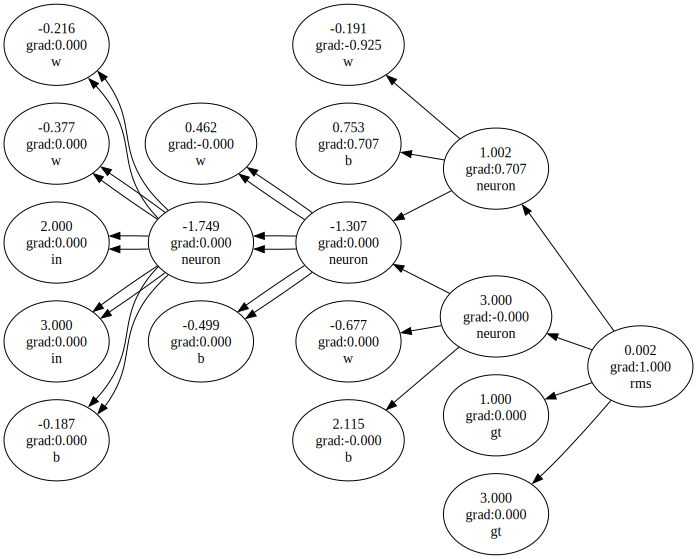

In [2]:
a = Value(2.0, op='in')
b = Value(3.0, op='in')

for e in range(1000):
    c = m0.forward([a, b])

    loss = loss_fc.forward(c, [Value(1.0, op='gt'), Value(3.0, op='gt')])

    m0.zero_grad()

    loss_fc.backward()
    m0.backward()
    
    optimizer.step(m0.parameters())

dot = to_dot(loss)
Source(dot.source)